In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
# Import des librairies
from fastai.vision.all import *
from fastai.vision.widgets import *

Dans ce notebook, je vais utiliser la librarie fastai de Jeremy Howard afin de construire un classifieur de 130 races de chiens  
120 races proviennent du  dataset pris sur Kaggle, et 10 autres ont ete rajoutees:  
labradoodle,  
dalmatien,  
berger belge,  
berger australien,  
shih tzu,  
dogue argentin,  
american bully,  
jack russell,  
cane corso et akita.  
Les images des 10 dernieres classes ont ete scrapees grace a l'extension Fatkun sur Google Chrome

In [3]:
# # On importe le dataset et on le dezippe
from zipfile import ZipFile
file_name ='/storage/races.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('OK')

OK


In [4]:
# Path pour acceder aux 130 races
path = Path('races/') 

In [5]:
# On applique des transformations uniquement au train set
races_datablock= DataBlock(blocks= (ImageBlock, CategoryBlock),
                           get_items= get_image_files,
                           splitter= RandomSplitter(valid_pct= 0.2, seed=76),
                           get_y = parent_label,
                           item_tfms= RandomResizedCrop(224, min_scale=0.3), #
                           batch_tfms= aug_transforms(mult=2))

In [6]:
#Charger le train et validation set
data= races_datablock.dataloaders(path)

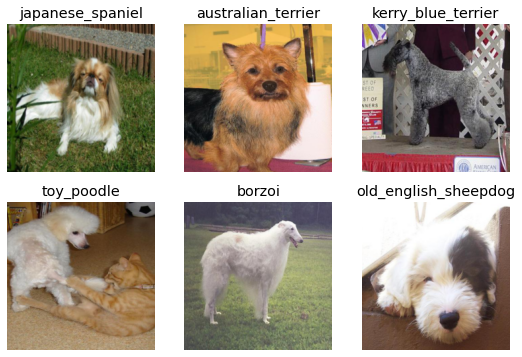

In [8]:
# Visualisation d'images
data.valid.show_batch(max_n= 6, nrows=2)

In [9]:
# Afficher toutes les classes (labels/races) et le nombre total
print(data.train.c)


130


In [10]:
# Import du resau de neurones resnet34 pour le transfer learning
learn= cnn_learner(data, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [11]:
# Entrainnement sur 15 epoch (le taux d'erreur est de 14%)
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,4.816116,2.555163,0.583371,01:18
1,2.073491,0.742225,0.218482,01:19
2,1.464874,0.613450,0.191143,01:20
3,1.289969,0.591751,0.188432,01:21
4,1.184195,0.558546,0.177813,01:20
5,1.097590,0.537277,0.168098,01:20
6,1.040864,0.523381,0.163353,01:20
7,1.009009,0.505956,0.156349,01:21
8,0.940115,0.491469,0.151378,01:21
9,0.922974,0.477258,0.146634,01:21


In [12]:
# On sauvegarde le modele
learn.save('model-1')

Path('models/model-1.pth')

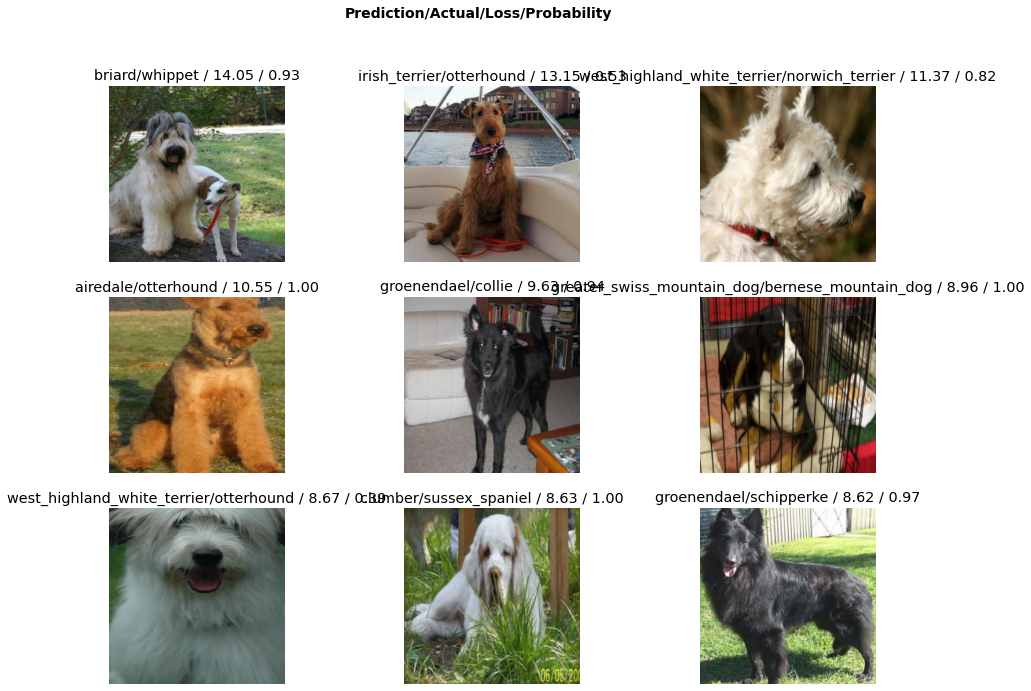

In [13]:
#Interpretation du modele et visualisation de 9 images ou il y a eu le plus de confusion entre les races
interp= ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [14]:
# Liste des races ou il y a eu au moins 3 confusions
interp.most_confused(min_val=3)

[('eskimo_dog', 'siberian_husky', 16),
 ('american_staffordshire_terrier', 'staffordshire_bullterrier', 7),
 ('english_foxhound', 'walker_hound', 7),
 ('shetland_sheepdog', 'collie', 7),
 ('staffordshire_bullterrier', 'american_staffordshire_terrier', 7),
 ('beagle', 'basset', 6),
 ('border_collie', 'collie', 6),
 ('cardigan', 'pembroke', 6),
 ('collie', 'border_collie', 6),
 ('silky_terrier', 'australian_terrier', 6),
 ('toy_terrier', 'miniature_pinscher', 6),
 ('walker_hound', 'english_foxhound', 6),
 ('boxer', 'bull_mastiff', 5),
 ('entlebucher', 'appenzeller', 5),
 ('eskimo_dog', 'malamute', 5),
 ('lhasa', 'shih', 5),
 ('miniature_poodle', 'standard_poodle', 5),
 ('norfolk_terrier', 'norwich_terrier', 5),
 ('siberian_husky', 'eskimo_dog', 5),
 ('siberian_husky', 'malamute', 5),
 ('toy_poodle', 'miniature_poodle', 5),
 ('belgian_shepherd_black', 'groenendael', 4),
 ('collie', 'shetland_sheepdog', 4),
 ('german_shepherd', 'malinois', 4),
 ('irish_wolfhound', 'scottish_deerhound', 4),

In [15]:
# On unfreeze le modele
learn.unfreeze()

In [16]:
# Entrainnement
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.806210,2.227106,0.584501,01:46
1,1.654721,0.985824,0.288974,01:48


In [17]:
# Chargement du modele avant le dernier entrainnement
learn.load('model-1')

SuggestedLRs(lr_min=1.58489319801447e-07, lr_steep=9.12010818865383e-07)

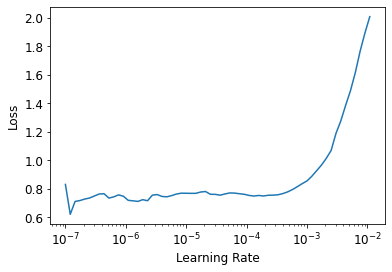

In [18]:
# Detection du bon learning rate
learn.lr_find()

In [19]:
# Il n'y a pas de chute dramatique de la courbe donc le taux d'erreur risque d'etre plus eleve qu'auparavant
learn.unfreeze()
learn.fit_one_cycle(10, max_lr= slice(1.5e-8,1.5e-7))

epoch,train_loss,valid_loss,error_rate,time
0,1.599764,1.702050,0.442160,01:46
1,2.533492,2.489457,0.634659,01:47
2,2.498100,2.411042,0.605061,01:48
3,2.180877,1.827023,0.506552,01:48
4,1.915282,1.476878,0.429056,01:48
5,1.634812,1.204136,0.359015,01:48
6,1.415697,1.020451,0.305242,01:48
7,1.189860,0.857482,0.256665,01:48
8,0.994052,0.786737,0.239268,01:48
9,0.930386,0.769124,0.231134,01:48


In [20]:
# Sauvegarde du 2nd modele
learn.save('model-2')

Path('models/model-2.pth')

In [21]:
# Chargement 1er modele
learn.load('model-1')


In [22]:
#Export en pkl
learn.export()

In [23]:
# Test
learn_inf = load_learner('export.pkl')

In [24]:
learn_inf.predict('dalmat2.jpg')

('dalmatian',
 tensor(40),
 tensor([7.6748e-08, 4.2409e-09, 4.1227e-06, 4.4305e-09, 3.8798e-08, 5.1999e-08, 9.3684e-07, 6.9495e-07, 2.4897e-05, 2.4532e-09, 1.5624e-09, 9.0226e-09, 1.3988e-07, 1.7448e-08, 8.2705e-07, 1.5150e-07,
         2.6841e-07, 1.9776e-08, 5.5042e-09, 7.4526e-07, 1.2002e-06, 1.1624e-08, 4.4087e-08, 1.8273e-07, 1.0324e-08, 1.7082e-07, 5.9948e-09, 2.9135e-08, 4.9238e-07, 2.8596e-08, 7.7842e-09, 4.5153e-07,
         3.8194e-08, 1.9286e-07, 7.0225e-08, 4.5213e-09, 1.3161e-07, 1.2639e-08, 1.7096e-07, 3.9817e-06, 9.9968e-01, 2.4724e-09, 2.3090e-08, 1.2137e-08, 5.0482e-07, 3.8503e-06, 1.2233e-07, 5.3034e-05,
         6.7641e-07, 8.4481e-06, 1.1919e-08, 2.0469e-06, 2.4558e-08, 4.3199e-09, 3.5031e-05, 8.8311e-08, 7.3091e-08, 1.2189e-08, 9.2097e-05, 2.5218e-07, 3.2904e-07, 7.3616e-09, 6.1673e-08, 3.0935e-09,
         7.7033e-09, 2.9206e-08, 9.2095e-08, 8.5230e-07, 2.5706e-07, 4.4406e-07, 2.4876e-08, 8.3689e-08, 8.6718e-08, 4.0700e-07, 1.4099e-05, 4.9533e-07, 2.3884e-05, 2.85

In [25]:
# Liste de toutes les races
learn_inf.dls.vocab

(#130) ['affenpinscher','afghan_hound','african_hunting_dog','airedale','akita','american_bully','american_staffordshire_terrier','appenzeller','australian_shepherd','australian_terrier'...]